# SARK-110 Plot example

Simple Jupyter notebook example for interacting with the SARK-110 Antenna Analyzer.

Please ensure that the analyzer is connected to the computer using the USB cable and in Computer Control mode.

In [1]:
from sark110 import *
import math
import matplotlib.pyplot as plt

Enter frequency limits:

In [2]:
fr_start = 12000000   # Frequency start in Hz
fr_stop =  15000000   # Frequency stop in Hz
points = 51           # Number of points

## Utility functions

In [3]:
def z2vswr(rs: float, xs: float, z0=50 + 0j) -> float:
    gamma = math.sqrt((rs - z0.real) ** 2 + xs ** 2) / math.sqrt((rs + z0.real) ** 2 + xs ** 2)
    if gamma > 0.980197824:
        return 99.999
    swr = (1 + gamma) / (1 - gamma)
    return swr


def z2mag(r: float, x: float) -> float:
    return math.sqrt(r ** 2 + x ** 2)


def z2gamma(rs: float, xs: float, z0=50 + 0j) -> complex:
    z = complex(rs, xs)
    return (z - z0) / (z + z0)

## Connect to the device

In [4]:
sark110 = Sark110()
sark110.open()
sark110.connect()
if not sark110.is_connected:
    print("Device not connected")
    exit(-1)
else:
    print("Device connected")

Device connected


In [5]:
sark110.buzzer()
print(sark110.fw_protocol, sark110.fw_version)

2566 1.5


## Acquire the data

In [6]:
y = []
y1 = []
x = []
rs = [0]
xs = [0]
print("start:", fr_start, "stop:", fr_stop, "points:", points)
for i in range(points):
    fr = int(fr_start + i * (fr_stop - fr_start) / (points - 1))
    sark110.measure(fr, rs, xs)
    x.append(fr / 1e6)
    y.append(z2vswr(rs[0][0], xs[0][0]))    # VSWR
    y1.append(z2mag(rs[0][0], xs[0][0]))    # ZMAG

start: 12000000 stop: 15000000 points: 51


## Plot the data (single axis)

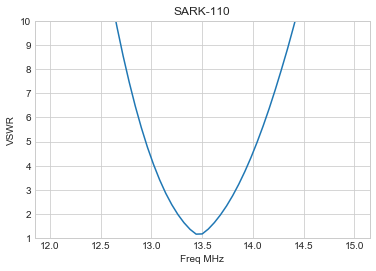

In [7]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, y)
plt.title('SARK-110')
plt.xlabel('Freq MHz')
plt.ylabel('VSWR')
plt.ylim(1., 10.)
plt.show()

## Plot the data (dual axis) 

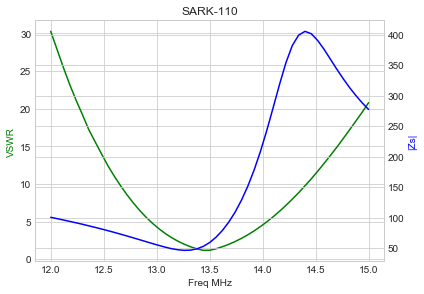

In [8]:
plt.style.use('seaborn-whitegrid')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y, 'g-')
ax2.plot(x, y1, 'b-')
ax1.set_xlabel('Freq MHz')
ax1.set_ylabel('VSWR', color='g')
ax2.set_ylabel('|Zs|', color='b')
fig.tight_layout() 
plt.title('SARK-110')

plt.show()

In [9]:
sark110.close()